In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chardet 
import datetime
import matplotlib.ticker as plticker
import matplotlib.patches as mpatches

#with open("ks-projects-201801.csv", 'rb') as rawdata:
#    result = chardet.detect(rawdata.read(20000))

data = pd.read_csv('ks-projects-201801.csv', encoding = 'utf-8')

data['launched'] = pd.to_datetime(data.launched)
data['deadline'] = pd.to_datetime(data.deadline)
data['campaign'] = data['deadline'] - data['launched']
data['state2'] = pd.Series(['other' if x in ['live', 'undefined', 'suspended'] else x for x in data.state])
data['month'] = [x.date().strftime("%Y-%m") for x in data.launched]

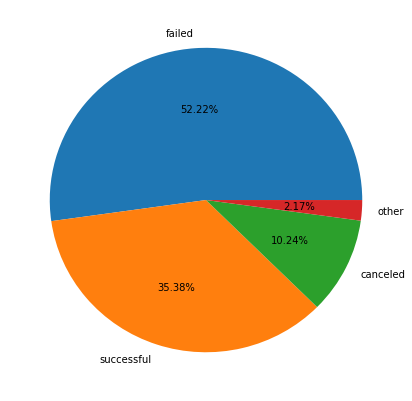

In [2]:
# VIS 1
counts = data.state2.value_counts()
df = pd.DataFrame({'Count':[counts[0], counts[1], counts[2], counts[3]],
                   'Name':[counts.index[0], counts.index[1], counts.index[2], counts.index[3]]},
                  columns=['Count', 'Name'])
plt.figure(figsize=(7,7))
plt.pie(df.Count, labels = df.Name, autopct='%.2f%%')
#plt.savefig('pie1.png')
plt.show()

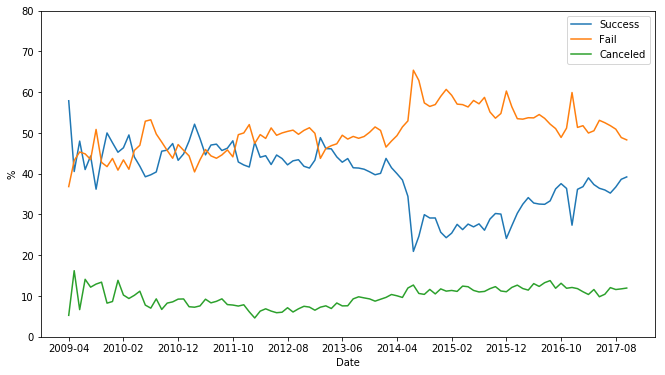

In [3]:
# Vis 2
monthly = data.loc[:,['ID', 'month', 'state2']].groupby(by=['month', 'state2']).count()
monthly = monthly[2:]
monthly = monthly.unstack(level=-1)
monthly.columns = monthly.columns.droplevel(0)
monthly= monthly.fillna(0)
monthly.columns.name = None
monthly = monthly.reset_index()
monthly['tot'] = monthly.canceled + monthly.failed + monthly.successful + monthly.other

fig, ax = plt.subplots(figsize=(11,6))

ax.plot_date(y= monthly[:-3].successful/monthly[:-3].tot*100, x = monthly[:-3].month, fmt = '-', label = 'Success')
ax.plot_date(y= monthly[:-3].failed/monthly[:-3].tot*100, x = monthly[:-3].month, fmt = '-', label = 'Fail')
ax.plot_date(y= monthly[:-3].canceled/monthly[:-3].tot*100, x = monthly[:-3].month, fmt = '-', label = 'Canceled')

loc = plticker.MultipleLocator(base=10.0)
ax.xaxis.set_major_locator(loc)
ax.set_ylim([0,80])
ax.set_ylabel('%')
ax.set_xlabel('Date')

plt.xticks(range(0,110, 10), monthly[:-3].month[0::10].values)
plt.legend()
#plt.savefig('timeSeries.png')
plt.show()

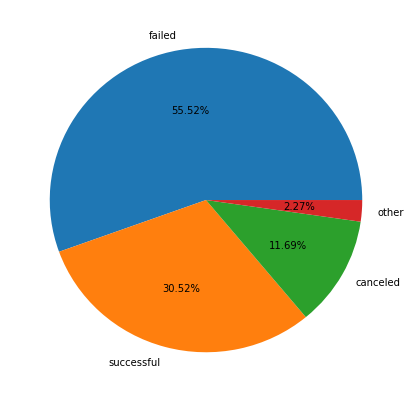

In [4]:
# VIS 1 UPDATED
counts = data[(data.launched >= '2014-06-01 00:00:00') & (data.launched < '2017-11-01 00:00:00')].state2.value_counts()
df = pd.DataFrame({'Count':[counts[0], counts[1], counts[2], counts[3]],
                   'Name':[counts.index[0], counts.index[1], counts.index[2], counts.index[3]]},
                  columns=['Count', 'Name'])
plt.figure(figsize=(7,7))
plt.pie(df.Count, labels = df.Name, autopct='%.2f%%')
#plt.savefig('pie2.png')
plt.show()

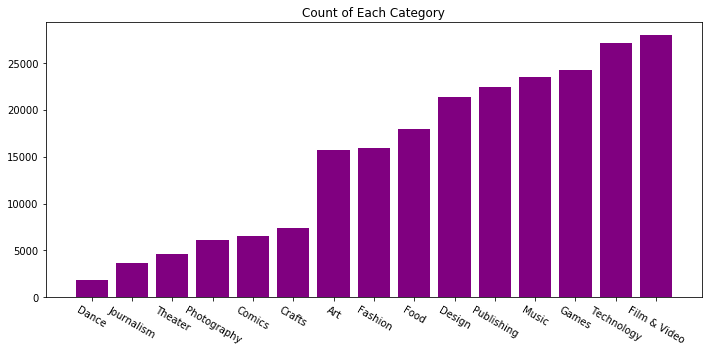

In [5]:
# Vis 3A
df = data[(data.launched >= '2014-06-01 00:00:00') & (data.launched < '2017-11-01 00:00:00')].loc[:,['main_category','usd_pledged_real']]\
                    .groupby(['main_category']).agg(['sum', 'mean', 'count', 'median'])
series3 = df.sort_values(by=[('usd_pledged_real','count')])[('usd_pledged_real','count')]

plt.figure(figsize = (10,5))
ax3 = plt.subplot(111)
ax3.bar(range(len(series3)), series3, color='purple')
ax3.set_title("Count of Each Category")
ax3.set_xticks(range(len(series3)))
ax3.set_xticklabels(series3.index.values)
for tick in ax3.get_xticklabels():
    tick.set_rotation(330)
plt.tight_layout()
#plt.savefig('count.png')
plt.show()

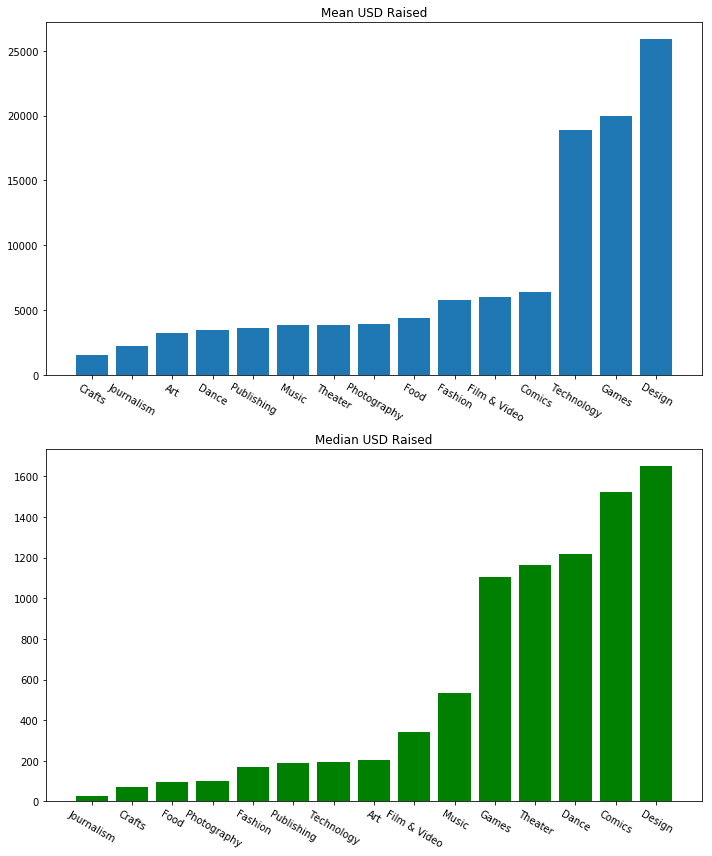

In [6]:
# Vis 3B
series1 = df.sort_values(by=[('usd_pledged_real','mean')])[('usd_pledged_real','mean')]
series2 = df.sort_values(by=[('usd_pledged_real','median')])[('usd_pledged_real','median')]


plt.figure(figsize = (10,12))

ax1 = plt.subplot(211)
ax1.bar(range(len(series1)), series1)
ax1.set_title("Mean USD Raised")
ax1.set_xticks(range(len(series1)))
ax1.set_xticklabels(series1.index.values)
for tick in ax1.get_xticklabels():
    tick.set_rotation(330)
    
ax2 = plt.subplot(212)
ax2.bar(range(len(series2)), series2, color='green')
ax2.set_title("Median USD Raised")
ax2.set_xticks(range(len(series2)))
ax2.set_xticklabels(series2.index.values)
for tick in ax2.get_xticklabels():
    tick.set_rotation(330)

plt.tight_layout()
#plt.savefig('meanMedian.png')
plt.show()

C:\Python\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


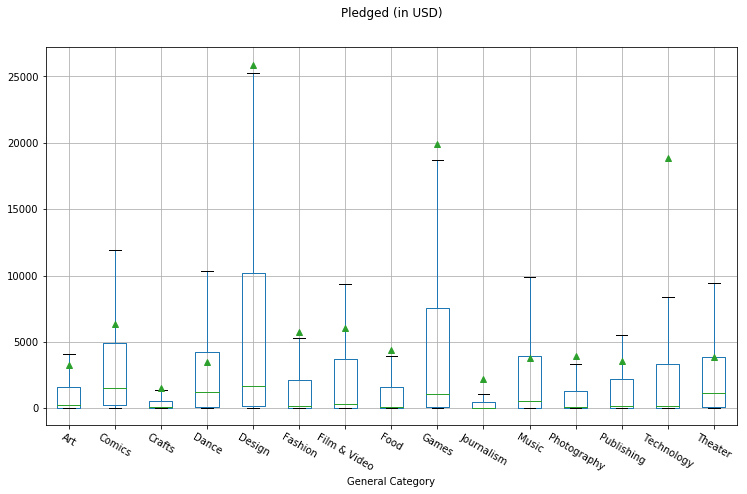

In [7]:
# VIS 3C
data[(data.launched >= '2014-06-01 00:00:00') & (data.launched < '2017-11-01 00:00:00')]\
        .loc[:,['main_category','usd_pledged_real']].boxplot(by='main_category', showfliers=False, 
                                                         figsize = (12,7), showmeans=True)
plt.xticks(rotation=330)
plt.suptitle('Pledged (in USD)')
plt.title('')
plt.xlabel('General Category')
#plt.savefig('box.png')
plt.show()

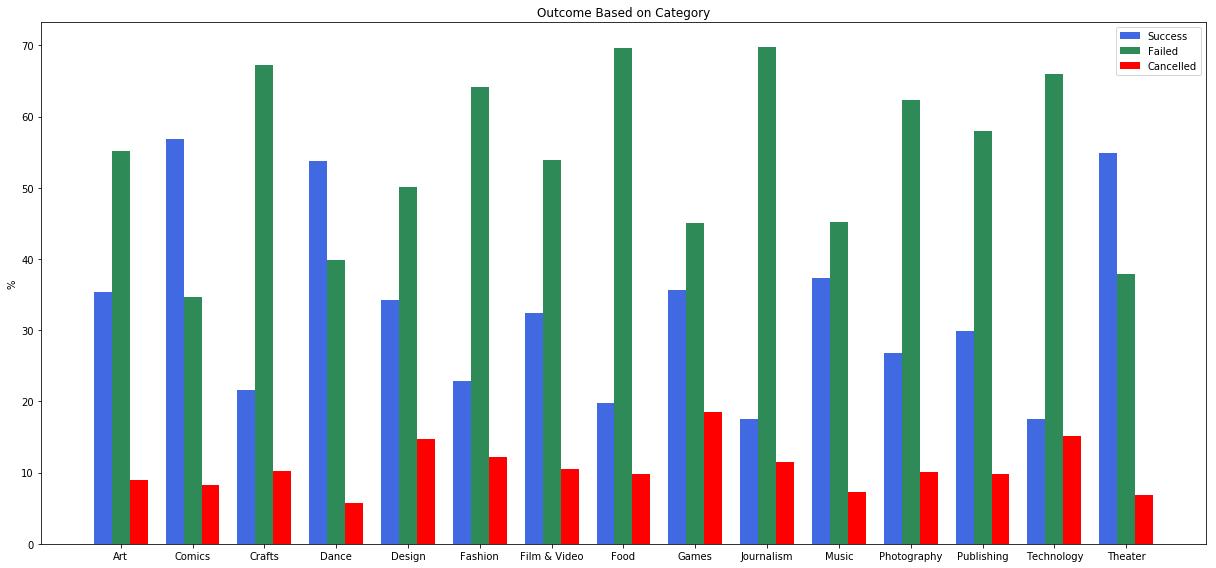

In [8]:
# Vis 4
df = data[(data.launched >= '2014-06-01 00:00:00') & (data.launched < '2017-11-01 00:00:00')]\
    .loc[:,['main_category','ID', 'state2']].groupby(['main_category', 'state2']).agg(['count'])    
df = df.unstack(level=-1)
df.index.name = None
df.columns = df.columns.droplevel(0)
df.columns = df.columns.droplevel(0)
df['tot'] = df.canceled+df.failed+df.other+df.successful

N = 15
success = df.successful/df.tot * 100
fail = df.failed/df.tot * 100
cancel = df.canceled/df.tot * 100

ind = np.arange(N)  # the x locations for the groups
width = 0.25       # the width of the bars

fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, success, width, color='royalblue')
rects2 = ax.bar(ind+width, fail, width, color='seagreen')
rects3 = ax.bar(ind+2*width, cancel, width, color='red')

ax.set_ylabel('%')
ax.set_title('Outcome Based on Category')
ax.set_xticks(ind + 2*width / 2)
ax.set_xticklabels( df.index.values )

ax.legend( (rects1[0], rects2[0], rects3[0]), ('Success', 'Failed', 'Cancelled') )
plt.tight_layout()
#plt.savefig('breakdown.png')
plt.show()

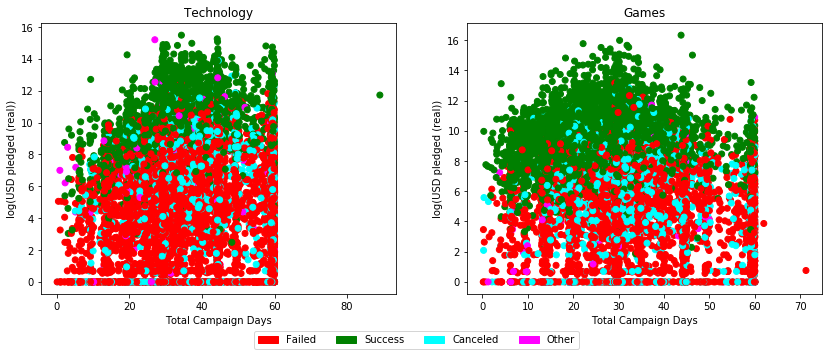

In [9]:
# VIS 6
sub1 = data[(data.launched >= '2014-06-01 00:00:00') & (data.launched < '2017-11-01 00:00:00') &\
           (data.main_category == 'Technology')].reset_index(drop=True)
sub2 = data[(data.launched >= '2014-06-01 00:00:00') & (data.launched < '2017-11-01 00:00:00') &\
           (data.main_category == 'Games')].reset_index(drop=True)

color1 = pd.Categorical(sub1.state2)
color1 = np.where(color1=='canceled', 'cyan', np.where(color1=='failed', 'red', np.where(color1=='other', 'magenta', 'green')))

fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(121)
ax.scatter(sub1.campaign.values / np.timedelta64(1, 'D'), np.log(sub1.usd_pledged_real+1), c= color1)

ax.set_ylabel('log(USD pledged (real))')
ax.set_xlabel('Total Campaign Days')
ax.set_title('Technology')

color2 = pd.Categorical(sub2.state2)
color2 = np.where(color2=='canceled', 'cyan', np.where(color2=='failed', 'red', np.where(color2=='other', 'magenta', 'green')))

ax2 = fig.add_subplot(122)
ax2.scatter(sub2.campaign.values / np.timedelta64(1, 'D'), np.log(sub2.usd_pledged_real+1), c= color2)
ax2.set_ylabel('log(USD pledged (real))')
ax2.set_xlabel('Total Campaign Days')
ax2.set_title('Games')

red = mpatches.Patch(color='red', label='Failed')
cyan = mpatches.Patch(color='cyan', label='Canceled')
magenta = mpatches.Patch(color='magenta', label='Other')
green = mpatches.Patch(color='green', label='Success')
lgd = ax2.legend(loc = (-0.6, -0.2), handles=[red, green, cyan, magenta], ncol = 4)
#plt.savefig('scatter1.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

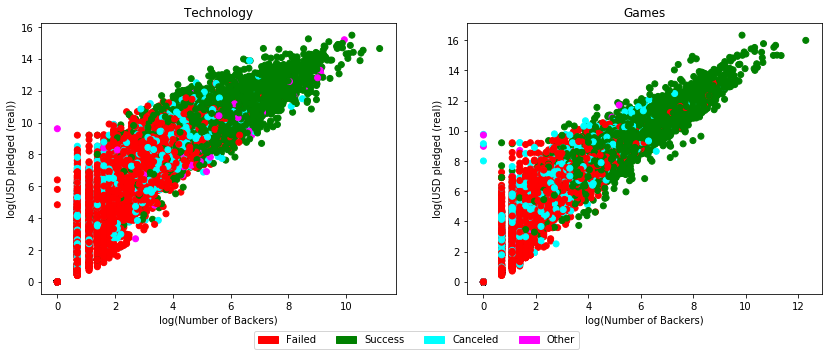

In [10]:
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(121)
ax.scatter(np.log(sub1.backers+1), np.log(sub1.usd_pledged_real+1), c= color1)

ax.set_ylabel('log(USD pledged (real))')
ax.set_xlabel('log(Number of Backers)')
ax.set_title('Technology')

ax2 = fig.add_subplot(122)
ax2.scatter(np.log(sub2.backers+1), np.log(sub2.usd_pledged_real+1), c= color2)
ax2.set_ylabel('log(USD pledged (real))')
ax2.set_xlabel('log(Number of Backers)')
ax2.set_title('Games')

red = mpatches.Patch(color='red', label='Failed')
cyan = mpatches.Patch(color='cyan', label='Canceled')
magenta = mpatches.Patch(color='magenta', label='Other')
green = mpatches.Patch(color='green', label='Success')
lgd = ax2.legend(loc = (-0.6, -0.2), handles=[red, green, cyan, magenta], ncol = 4)
#plt.savefig('scatter2.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

C:\Python\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
C:\Python\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: divide by zero encountered in log


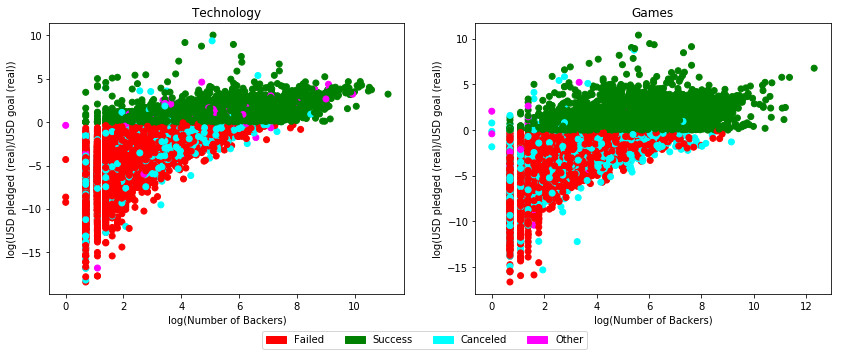

In [11]:
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(121)
ax.scatter(np.log(sub1.backers+1), np.log(sub1.usd_pledged_real/sub1.usd_goal_real), c= color1)

ax.set_ylabel('log(USD pledged (real)/USD goal (real))')
ax.set_xlabel('log(Number of Backers)')
ax.set_title('Technology')

ax2 = fig.add_subplot(122)
ax2.scatter(np.log(sub2.backers+1), np.log(sub2.usd_pledged_real/sub2.usd_goal_real), c= color2)
ax2.set_ylabel('log(USD pledged (real)/USD goal (real))')
ax2.set_xlabel('log(Number of Backers)')
ax2.set_title('Games')

red = mpatches.Patch(color='red', label='Failed')
cyan = mpatches.Patch(color='cyan', label='Canceled')
magenta = mpatches.Patch(color='magenta', label='Other')
green = mpatches.Patch(color='green', label='Success')
lgd = ax2.legend(loc = (-0.6, -0.2), handles=[red, green, cyan, magenta], ncol = 4)
#plt.savefig('scatter2.1.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

## HOW I GENERATED JSON

In [12]:
df1 = data[(data.launched >= '2014-06-01 00:00:00') & (data.launched < '2017-11-01 00:00:00')].loc[:,['ID', 'state2', 'main_category', 'category']]\
.groupby(by=['main_category', 'category', 'state2']).count()
df1 = df1.reset_index()
df1.columns = ['main_category', 'category','state2', 'value']
#df1.to_json('data.json', orient='records')

In [13]:
# ALTERNATIVE
# Source: https://www.reddit.com/r/learnpython/comments/4pn5gh/help_turning_a_csv_file_into_a_heirachal_json_file/
from collections import OrderedDict
import json

def next_node(node, key):
    result = None
    children = node.setdefault('children', [])
    for child in children:
        if (child['name'] == key):
            result = child
    if not result:
        if isinstance(key, str):
            result = OrderedDict(name=key)  
        else:
            result = OrderedDict(size=key) 
        children.append(result)
    return result

tree_root = OrderedDict(name='flare')   

for line in df1[0:16].values:
    node = tree_root
    for categories in line:
        node = next_node(node, categories)

print(json.dumps(tree_root, indent = 1))

{
 "name": "flare",
 "children": [
  {
   "name": "Art",
   "children": [
    {
     "name": "Art",
     "children": [
      {
       "name": "canceled",
       "children": [
        {
         "size": 433
        }
       ]
      },
      {
       "name": "failed",
       "children": [
        {
         "size": 2701
        }
       ]
      },
      {
       "name": "other",
       "children": [
        {
         "size": 29
        }
       ]
      },
      {
       "name": "successful",
       "children": [
        {
         "size": 1711
        }
       ]
      }
     ]
    },
    {
     "name": "Ceramics",
     "children": [
      {
       "name": "canceled",
       "children": [
        {
         "size": 25
        }
       ]
      },
      {
       "name": "failed",
       "children": [
        {
         "size": 141
        }
       ]
      },
      {
       "name": "successful",
       "children": [
        {
         "size": 122
        }
       ]
      }
     ]
    },
   